# Nimaye Garodia ML Final (Data Problem)


Importing the required packages and the data. I noticed that the columns country, region_wb and gdp were inappropriate to include. This is because country and region_wb are qualitative, which makes them hard to work with while GDP has a lot of missingness. If we include GDP, our data will be shortened to very few rows due to the large presence of missingness - therefore, I eliminated these columns from the predictors list.


# Descriptives and Naive Model


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("inequality_class_final.csv")
predictors = [
    "federalism_GT",
    "statehiste1500_02n",
    "origtime2",
    "eleva",
    "avg_temp",
    "Maddison_gdppc_1990_estimate_ln",
    "lp_lat_abst_fill",
    "mountains",
    "log_ocdistance_new",
    "rugged",
    "tropical",
    "pmean",
    "irri_impact5",
    "frstdays",
    "sd_emeanclip",
    "Urbanpopulationoftotalpop",
    "Fixedtelephonesubscriptionsp",
    "dist2suitable_km_new",
    "Employmentinagricultureof",
    "Accesstoelectricityofpopu",
    "pln_sxHr_mean",
    "agyears_ext",
    "popd_1500AD",
]
df.dropna(subset=predictors, inplace=True)
df.dropna(subset=["Ygini_disp"],inplace=True)
df.reset_index(drop=True, inplace=True)
print(len(df))
df.head()


122


,country,federalism_GT,id,region_wb,gdp,statehiste1500_02n,origtime2,eleva,avg_temp,Maddison_gdppc_1990_estimate_ln,...,sd_emeanclip,Urbanpopulationoftotalpop,dist2suitable_km_new,Ygini_disp,Fixedtelephonesubscriptionsp,Employmentinagricultureof,Accesstoelectricityofpopu,pln_sxHr_mean,agyears_ext,popd_1500AD
0,Mexico,2.0,NaN,NaN,NaN,0.311557,15000.0,1076.740352,21.6,9.079312,...,0.776437,76.920,191207.98,46.400002,18.318046,13.790000,98.110626,2626.828031,4100.0,12.078997
1,Sweden,0.0,17568.0,Europe and Central Asia,49296.81030,0.124440,8000.0,359.346328,3.6,10.248469,...,0.248912,84.588,108188.94,25.000000,60.024409,2.250000,100.000000,0.000000,5500.0,0.842480
2,Switzerland,2.0,17777.0,Europe and Central Asia,64943.53591,0.358282,45000.0,1317.581088,7.0,10.436217,...,0.625552,73.530,358067.16,29.900000,65.373435,4.000000,100.000000,877.940256,5500.0,19.928775
3,Ghana,0.0,NaN,NaN,NaN,0.082024,135000.0,208.329245,27.6,7.401412,...,0.074167,48.669,351368.59,43.000000,1.639566,53.939999,56.975372,6889.873359,3500.0,7.670432
4,South Africa,1.0,NaN,NaN,NaN,0.000000,135000.0,1059.070030,18.5,8.761950,...,0.441714,60.616,368782.00,63.500000,9.938974,6.010000,82.000000,2711.073385,1700.0,0.132444


Despite dropping all missing rows, we have 122 rows to work with. Now, we run descriptives and learn more about our data.


In [75]:
df.describe()


,federalism_GT,id,gdp,statehiste1500_02n,origtime2,eleva,avg_temp,Maddison_gdppc_1990_estimate_ln,lp_lat_abst_fill,mountains,...,sd_emeanclip,Urbanpopulationoftotalpop,dist2suitable_km_new,Ygini_disp,Fixedtelephonesubscriptionsp,Employmentinagricultureof,Accesstoelectricityofpopu,pln_sxHr_mean,agyears_ext,popd_1500AD
count,122.000000,52.000000,52.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,1.220000e+02,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.319672,10619.615385,21233.999568,0.196417,61610.655738,634.469104,17.935246,8.408562,0.309183,0.281470,...,0.354411,55.013451,4.168017e+05,39.718033,18.343919,31.373443,73.823502,3339.574234,4636.475410,7.143972
std,0.683530,6396.481628,18085.443459,0.198441,50347.276318,534.702144,8.302842,1.232147,0.197119,0.259719,...,0.364894,22.082611,4.285466e+05,8.841899,18.239155,24.066001,32.828760,2538.951031,2263.892254,10.266141
min,0.000000,172.000000,1333.422223,0.000000,1200.000000,37.274918,-4.800000,5.586565,0.000000,0.000000,...,0.013036,9.864000,1.903038e+04,23.500000,0.005988,1.120000,3.000000,0.000000,400.000000,0.000040
25%,0.000000,4685.000000,7860.443405,0.000000,15000.000000,289.364720,10.825000,7.361069,0.144444,0.056920,...,0.146865,38.028250,1.083687e+05,33.075000,1.698312,9.962500,44.400000,910.880115,3025.000000,0.685577
50%,0.000000,11158.000000,14622.688945,0.136024,45000.000000,471.752943,20.500000,8.514521,0.296111,0.240427,...,0.243218,56.322500,2.768497e+05,40.149999,12.554469,29.570001,96.261115,2892.798305,4000.000000,3.071540
75%,0.000000,15548.000000,27486.744610,0.361690,135000.000000,788.913089,25.200000,9.337551,0.465569,0.412516,...,0.391784,73.547250,5.380928e+05,45.774999,30.095799,47.220000,100.000000,5658.055473,6375.000000,8.995226
max,2.000000,20778.000000,64943.535910,0.758315,160000.000000,2983.332166,29.100000,10.671559,0.711111,0.947847,...,1.906438,97.505000,2.076202e+06,66.500000,65.373435,89.529999,100.000000,7811.984733,10500.000000,69.302113


(array([14., 12., 17., 22., 23., 20.,  6.,  4.,  2.,  2.]),
 array([23.5, 27.8, 32.1, 36.4, 40.7, 45. , 49.3, 53.6, 57.9, 62.2, 66.5]),
 <BarContainer object of 10 artists>)

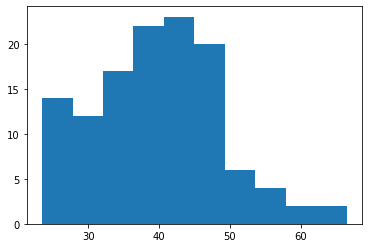

In [76]:
plt.hist(df["Ygini_disp"])


Even though Y is not normally distributed, it is close enough to use in machine learning. Next, we test the naive model.


In [77]:
mean = df["Ygini_disp"].mean()
mse_mean = 0
col = df["Ygini_disp"].tolist()
for i in range(len(col)):
    mse_mean = mse_mean + ((mean - col[i]) ** 2)
mse_mean = mse_mean / len(col)
print(mse_mean)


77.53836409758301


The naive model has a MSE of 77.5, so we only increase the model complexity if it improves on this. Next, we run a PCA analysis on our data because a lot of farming/weather/landscape variables could be collinear, since farming depends on weather and landscape, as well as percentage of urban population (urbanpopulationoftotalpop)


# PCA


My theory is that elevation, temperature, latitude, mountains, terrain (rugged), tropical, precipitation, irrigation impact, frost days, variance in elevation, plantation crop suitability and employment in agriculture all are related. This is because they are all similar geographical features that all affect the weather and climatic conditons, which in turn affects the agricultural independent variables.


In [78]:
scaler = StandardScaler()
PCA_predictors = [
    "eleva",
    "avg_temp",
    "lp_lat_abst_fill",
    "mountains",
    "rugged",
    "tropical",
    "pmean",
    "irri_impact5",
    "frstdays",
    "sd_emeanclip",
    "Employmentinagricultureof",
    "pln_sxHr_mean",
]
X = df[PCA_predictors]
X = scaler.fit_transform(X)
pca = PCA(n_components=0.8)  # 80% of variance explained of the PCA_predictors
X = pca.fit_transform(X)
print(pca.n_components_)
print(pca.explained_variance_ratio_)
X = pd.DataFrame(X)
df["PCA1"] = X[0]
df["PCA2"] = X[1]
df["PCA3"] = X[2]

df2 = df["Ygini_disp"]

nonPCA_predictors = [ "PCA1", "PCA2", "PCA3"]

for predictor in predictors:
    if predictor not in PCA_predictors:
        nonPCA_predictors.append(predictor)
predictors = nonPCA_predictors
print(predictors)
df = df[predictors]

df.info()


3
[0.42737344 0.24638819 0.1361083 ]
['PCA1', 'PCA2', 'PCA3', 'federalism_GT', 'statehiste1500_02n', 'origtime2', 'Maddison_gdppc_1990_estimate_ln', 'log_ocdistance_new', 'Urbanpopulationoftotalpop', 'Fixedtelephonesubscriptionsp', 'dist2suitable_km_new', 'Accesstoelectricityofpopu', 'agyears_ext', 'popd_1500AD']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PCA1                             122 non-null    float64
 1   PCA2                             122 non-null    float64
 2   PCA3                             122 non-null    float64
 3   federalism_GT                    122 non-null    float64
 4   statehiste1500_02n               122 non-null    float64
 5   origtime2                        122 non-null    float64
 6   Maddison_gdppc_1990_estimate_ln  122 non-null    float64
 7   log_ocdistance_ne

As seen above, the PCA was fairly successful since we were able to reduce the dimensionality of the IVs from 12 IVs to 3 latent spaces, which is a huge reduction. 20% of the variance of the IVs was lost, but this is an acceptable loss since the data is noisy and messy because it is measured in the real world.


# Linear and Polynomial Models


Linear: 44.20710695363563
Degree 2: 948.0866472641765
Degree 3: 29352.858959452144
Degree 4: 19021816.294400577
Degree 5: 3595142365.486253
Degree 6: 776680458973.5189
0.5988549937302275


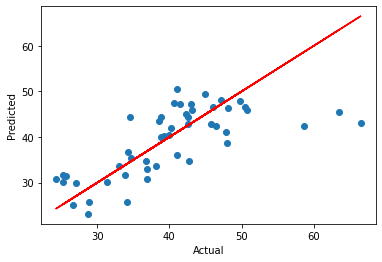

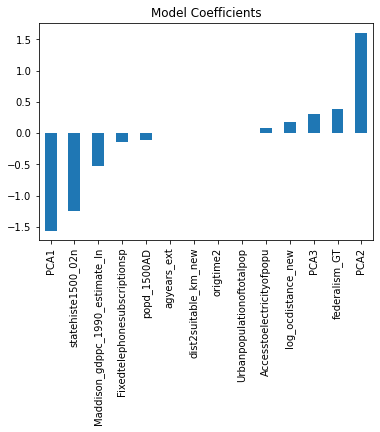

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df, df2, test_size=0.40
)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
# print(linear_regressor.coef_)
Y_pred = linear_regressor.predict(X_test)
print("Linear: " + str(mean_squared_error(Y_pred, Y_test)))

for i in range(5):
    X_train_poly = X_train
    Y_train_poly = Y_train.values
    poly = PolynomialFeatures(degree=i + 2)
    poly_x_values = poly.fit_transform(X_train_poly)
    poly.fit(poly_x_values, Y_train_poly)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, Y_train_poly)
    y_pred = regression_model.predict(poly.fit_transform(X_test))
    # print(regression_model.coef_)
    print(
        "Degree "
        + str(i + 2)
        + ": "
        + str(mean_squared_error(Y_test, y_pred, squared=True))
    )

print(np.mean(cross_val_score(linear_regressor, X_train, Y_train, cv=5)))

#plot regression line
plt.scatter(Y_test, Y_pred)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# plot coefficients
coef = pd.Series(linear_regressor.coef_, predictors).sort_values()
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

# Lasso and Ridge


In [80]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)
lasso.score(X_test, Y_test), lasso.score(X_train, Y_train)
Y_pred = lasso.predict(X_test)
mean_squared_error(Y_pred, Y_test)


43.300720411839905

# Tree-Based Models


In [81]:
dtree = DecisionTreeRegressor(criterion="squared_error", max_depth=100)
dtree = dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)
print(mean_squared_error(Y_pred, Y_test))


48.01776234694284


In [82]:
# code random forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print(mean_squared_error(Y_pred, Y_test))


37.9987473963228


In [83]:
# code polynomial regression with ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
ridge.score(X_test, Y_test), ridge.score(X_train, Y_train)
Y_pred = ridge.predict(X_test)
print(mean_squared_error(Y_pred, Y_test))
# display coefficients and equation
print(ridge.intercept_)
print(ridge.coef_)


44.45573457055492
44.92659316193144
[-1.55065262e+00  1.57967213e+00  2.35709549e-01  3.73770627e-01
 -5.64712785e-01  1.51084745e-05 -5.27741940e-01  1.76369725e-01
  8.17038347e-03 -1.45995331e-01 -1.48967339e-06  8.00822668e-02
 -1.10225140e-03 -1.04872904e-01]


In [ ]:
# run linear regression on the PCA
X_train, X_test, Y_train, Y_test = train_test_split(
    x_pca, df["Ygini_disp"], test_size=0.77, random_state=23
)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
# print(linear_regressor.coef_)
Y_pred = linear_regressor.predict(X_test)
print("Linear: " + str(mean_squared_error(Y_pred, Y_test)))


Linear: 38.23297516011615


In [ ]:
# perform Lasso on polynomial on df
for i in range(5):
    X_train_poly = X_train
    Y_train_poly = Y_train.values
    poly = PolynomialFeatures(degree=i + 2)
    poly_x_values = poly.fit_transform(X_train_poly)
    poly.fit(poly_x_values, Y_train_poly)
    regression_model = Lasso(alpha=1.0)
    regression_model.fit(poly_x_values, Y_train_poly)
    y_pred = regression_model.predict(poly.fit_transform(X_test))
    # print(regression_model.coef_)
    print(str(i + 2) + ": " + str(mean_squared_error(Y_test, y_pred, squared=True)))


2: 34.96594351931297
3: 41.61027765135021
4: 45.5349366457146
5: 45.137466331338494
6: 71.98908996392454


/Users/sanjeevchauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.171e+00, tolerance: 1.927e-01
  model = cd_fast.enet_coordinate_descent(


# Model Comparisons and Final Model Selection
